In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
df=pd.read_csv('/content/diabetes_prediction_dataset.csv.zip')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [29]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [30]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [31]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [32]:
df.shape

(100000, 9)

In [33]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [34]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [35]:
# getting the statistical measures of the data
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [54]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

<Axes: xlabel='diabetes', ylabel='count'>

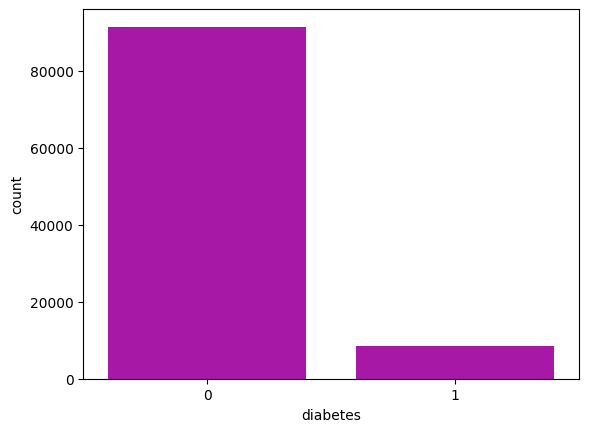

In [55]:
sns.countplot(x='diabetes',data=df, color='m')

In [38]:
df.drop(['gender'],axis=1,inplace=True)
df.columns

Index(['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [43]:
lab=LabelEncoder()
df['smoking_history']=lab.fit_transform(df['smoking_history'])
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,4,25.19,6.6,140,0
1,54.0,0,0,0,27.32,6.6,80,0
2,28.0,0,0,4,27.32,5.7,158,0
3,36.0,0,0,1,23.45,5.0,155,0
4,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,80.0,0,0,0,27.32,6.2,90,0
99996,2.0,0,0,0,17.37,6.5,100,0
99997,66.0,0,0,3,27.83,5.7,155,0
99998,24.0,0,0,4,35.42,4.0,100,0


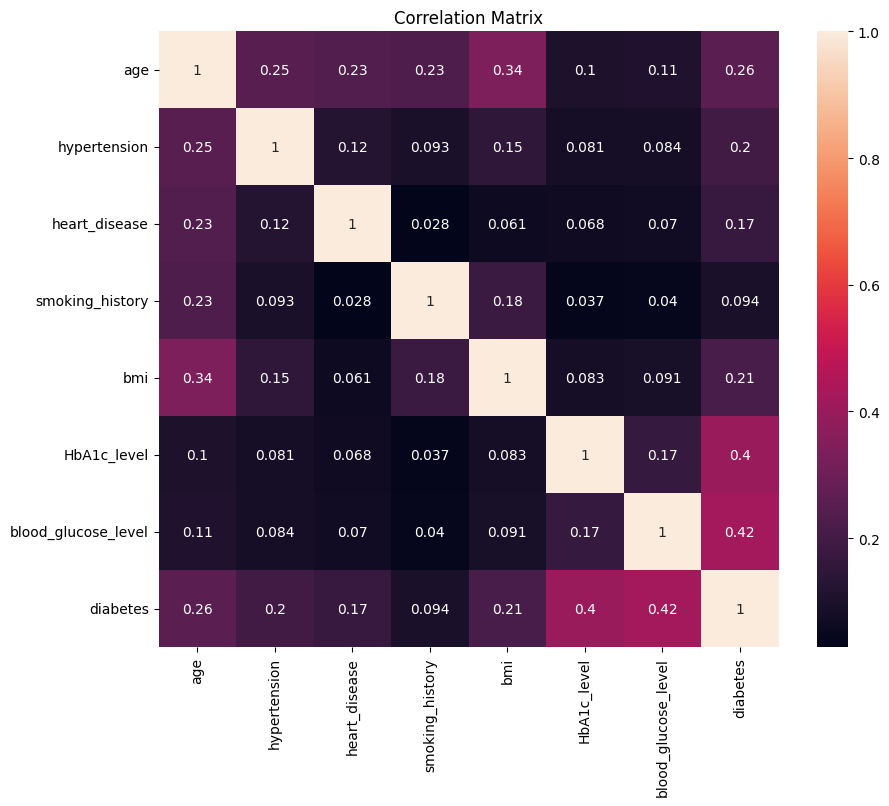

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True )
plt_title = plt.title("Correlation Matrix")

In [60]:
from imblearn.combine import SMOTETomek
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
smk = SMOTETomek(random_state=42)
X_resampled, Y_resampled = smk.fit_resample(x, y)
df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                          pd.DataFrame(Y_resampled, columns=['diabetes'])], axis=1)

In [61]:
df['diabetes'].value_counts()

diabetes
0    91057
1    91057
Name: count, dtype: int64

<Axes: xlabel='diabetes', ylabel='count'>

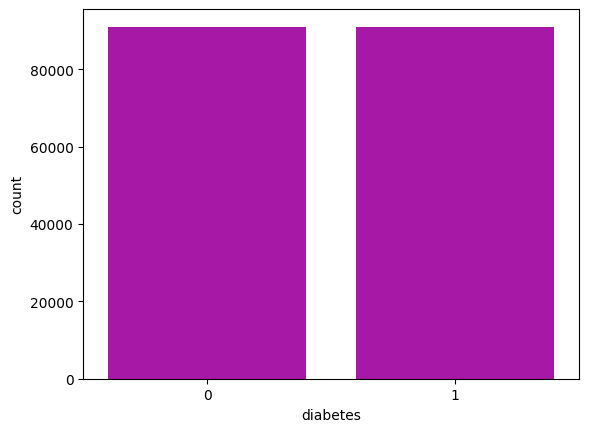

In [62]:
sns.countplot(x='diabetes',data=df, color='m')

In [66]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [67]:
scal=StandardScaler()
scal.fit(x_train)
x_train=scal.transform(x_train)
x_test=scal.transform(x_test)


In [73]:
models = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=7),
    'AdaBoost': AdaBoostClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    print("Model name is:", name)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("/" * 250)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("/" * 250)

Model name is: Random Forest
//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Confusion Matrix:
[[17912   212]
 [  485 17814]]
Accuracy Score: 0.9808637399445406
//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Model name is: K-Nearest Neighbors
//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Confusion Matrix:
[[17017  1107]
 [  720 17579]]
Accuracy Score: 0.9498393872003954
///////////////